<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/test_split_model_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://deeplizard.com/learn/video/lu7TCu7HeYc

from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.5g" % x))
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 999)
pd.set_option("max_colwidth", 500)
# try:
#  device_name = os.environ['COLAB_TPU_ADDR']
#  TPU_ADDRESS = 'grpc://' + device_name
#  print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#  print('TPU not found')
%load_ext autoreload
%autoreload 2

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Model, Sequential
from keras.layers import Input, add
from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from numpy import linalg as LA

np.random.seed(123)
X=np.random.randn(500,2)
beta=np.array([[1.,2.],[3.,4.]])
Y=X.dot(beta)
Y1=Y[:,0]
Y2=Y[:,1]

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 Hidden_dense1 (Dense)          (None, 2)            4           ['input_2[0][0]']                
                                                                                                  
 Hidden_dense2 (Dense)          (None, 1)            2           ['input_2[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3)            0           ['Hidden_dense1[0][0]',          
                                                                  'Hidden_dense2[0][0]']    

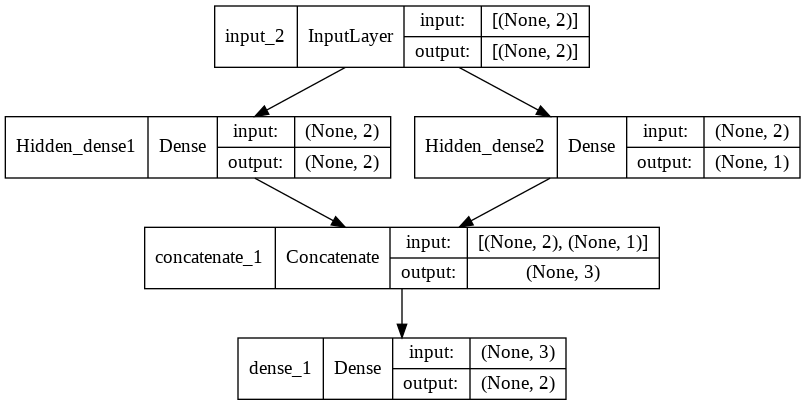

In [4]:
inputs = Input(shape=(2,) )
Hidden_dense1  = Dense(2, activation='linear', name="Hidden_dense1",  use_bias=False)(inputs)
Hidden_dense2  = Dense(1, activation='linear',   name="Hidden_dense2",  use_bias=False)(inputs)
merge_layer = keras.layers.concatenate([Hidden_dense1, Hidden_dense2])
outputs = Dense(2, activation='linear', use_bias=False)(merge_layer)

model=Model(inputs, outputs)
model.compile(optimizer="Adam", loss='mse')
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, )

In [5]:
epochs = 500
batch_size = int(X.shape[0]/10)
print(batch_size)
history = model.fit(X, Y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X, Y), shuffle=False)

50
Epoch 1/500
10/10 [==============================] - 1s 34ms/step - loss: 12.7731 - val_loss: 12.6267
Epoch 2/500
10/10 [==============================] - 0s 17ms/step - loss: 12.5126 - val_loss: 12.3660
Epoch 3/500
10/10 [==============================] - 0s 10ms/step - loss: 12.2521 - val_loss: 12.1060
Epoch 4/500
10/10 [==============================] - 0s 14ms/step - loss: 11.9927 - val_loss: 11.8473
Epoch 5/500
10/10 [==============================] - 0s 13ms/step - loss: 11.7345 - val_loss: 11.5900
Epoch 6/500
10/10 [==============================] - 0s 10ms/step - loss: 11.4778 - val_loss: 11.3342
Epoch 7/500
10/10 [==============================] - 0s 18ms/step - loss: 11.2227 - val_loss: 11.0800
Epoch 8/500
10/10 [==============================] - 0s 17ms/step - loss: 10.9691 - val_loss: 10.8273
Epoch 9/500
10/10 [==============================] - 0s 10ms/step - loss: 10.7171 - val_loss: 10.5762
Epoch 10/500
10/10 [==============================] - 0s 9ms/step - loss: 10.46

In [6]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    # print(name, weight.shape)
    print(name, weight)

Hidden_dense1/kernel:0 [[1.4476 0.69181]
 [1.1131 -0.44619]]
Hidden_dense2/kernel:0 [[-0.17728]
 [1.7297]]
dense_1/kernel:0 [[1.2598 1.2511]
 [-1.0216 0.70586]
 [0.66015 1.6895]]


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 Hidden_dense1 (Dense)          (None, 1)            2           ['input_4[0][0]']                
                                                                                                  
 Hidden_dense2 (Dense)          (None, 1)            2           ['input_4[0][0]']                
                                                                                                  
 concatenate_3 (Concatenate)    (None, 2)            0           ['Hidden_dense1[0][0]',          
                                                                  'Hidden_dense2[0][0]']    

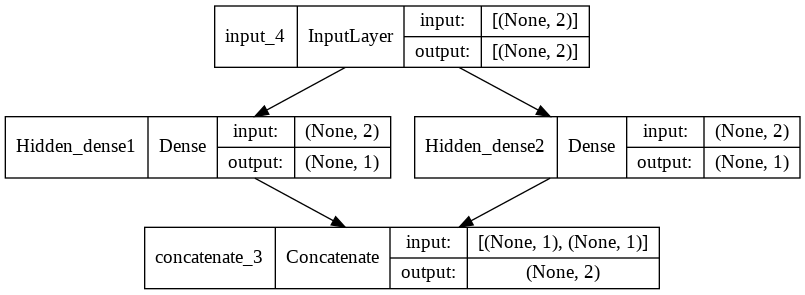

In [10]:
inputs = Input(shape=(2,) )
output1  = Dense(1, activation='linear', name="Hidden_dense1",  use_bias=False)(inputs)
output2  = Dense(1, activation='linear',   name="Hidden_dense2",  use_bias=False)(inputs)
merge_layer = keras.layers.concatenate([output1, output2])
# outputs = Dense(2, activation='linear', use_bias=False)(merge_layer)

model=Model(inputs, merge_layer)
model.compile(optimizer="Adam", loss='mse')
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, )

In [11]:
epochs = 100
batch_size = int(X.shape[0]/100)
print(batch_size)
history = model.fit(X, Y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X, Y), shuffle=False)

5
Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 19.6484 - val_loss: 19.2362
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 18.8384 - val_loss: 18.4310
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 18.0430 - val_loss: 17.6478
Epoch 4/100
100/100 [==============================] - 1s 6ms/step - loss: 17.2715 - val_loss: 16.8888
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 16.5244 - val_loss: 16.1542
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 15.8016 - val_loss: 15.4436
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 15.1027 - val_loss: 14.7566
Epoch 8/100
100/100 [==============================] - 0s 3ms/step - loss: 14.4270 - val_loss: 14.0926
Epoch 9/100
100/100 [==============================] - 0s 3ms/step - loss: 13.7741 - val_loss: 13.4509
Epoch 10/100
100/100 [==============================] - 0s 3ms/step - l

In [12]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    # print(name, weight.shape)
    print(name, weight)

Hidden_dense1/kernel:0 [[1]
 [3]]
Hidden_dense2/kernel:0 [[2]
 [3.9998]]


In [13]:
epochs = 100
batch_size = int(X.shape[0]/100)
print(batch_size)
history = model.fit(X, [Y2,Y1], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X, [Y2,Y1]), shuffle=False)

5
Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.7176 - val_loss: 0.4904
Epoch 2/100
100/100 [==============================] - 1s 5ms/step - loss: 0.3762 - val_loss: 0.2834
Epoch 3/100
100/100 [==============================] - 1s 5ms/step - loss: 0.2237 - val_loss: 0.1726
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1374 - val_loss: 0.1067
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0850 - val_loss: 0.0659
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0522 - val_loss: 0.0403
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0317 - val_loss: 0.0242
Epoch 8/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0189 - val_loss: 0.0143
Epoch 9/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.0083
Epoch 10/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0063 - val_

In [14]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    # print(name, weight.shape)
    print(name, weight)

Hidden_dense1/kernel:0 [[2]
 [4]]
Hidden_dense2/kernel:0 [[2]
 [4]]


In [15]:
epochs = 100
batch_size = int(X.shape[0]/100)
print(batch_size)
history = model.fit(X, [Y1,Y2], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X, [Y1,Y2]), shuffle=False)

5
Epoch 1/100
100/100 [==============================] - 0s 4ms/step - loss: 1.3684 - val_loss: 0.9011
Epoch 2/100
100/100 [==============================] - 1s 5ms/step - loss: 0.6795 - val_loss: 0.5017
Epoch 3/100
100/100 [==============================] - 1s 5ms/step - loss: 0.3901 - val_loss: 0.2956
Epoch 4/100
100/100 [==============================] - 1s 5ms/step - loss: 0.2317 - val_loss: 0.1766
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1384 - val_loss: 0.1052
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0820 - val_loss: 0.0619
Epoch 7/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0479 - val_loss: 0.0358
Epoch 8/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0274 - val_loss: 0.0202
Epoch 9/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.0111
Epoch 10/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0083 - val_

In [16]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    # print(name, weight.shape)
    print(name, weight)

Hidden_dense1/kernel:0 [[1]
 [3]]
Hidden_dense2/kernel:0 [[1]
 [3]]


In [17]:
YS=np.c_[Y2,Y1]
epochs = 100
batch_size = int(X.shape[0]/100)
print(batch_size)
history = model.fit(X, YS, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X, YS), shuffle=False)

5
Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6843 - val_loss: 0.4506
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3398 - val_loss: 0.2509
Epoch 3/100
100/100 [==============================] - 1s 5ms/step - loss: 0.1951 - val_loss: 0.1478
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1159 - val_loss: 0.0883
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0692 - val_loss: 0.0526
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0410 - val_loss: 0.0310
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0240 - val_loss: 0.0179
Epoch 8/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0101
Epoch 9/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0056
Epoch 10/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0042 - val_

In [18]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    # print(name, weight.shape)
    print(name, weight)

Hidden_dense1/kernel:0 [[2]
 [4]]
Hidden_dense2/kernel:0 [[0.99999]
 [3]]


In [19]:
np.random.seed(123)
X=np.random.randn(500,2)
beta=np.array([[1.,2.,3],[4.,5.,6]])
Y=X.dot(beta)
Y1=Y[:,0]
Y2=Y[:,1]
Y3=Y[:,2]

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 Hidden_dense1 (Dense)          (None, 1)            2           ['input_5[0][0]']                
                                                                                                  
 Hidden_dense2 (Dense)          (None, 1)            2           ['input_5[0][0]']                
                                                                                                  
 Hidden_dense3 (Dense)          (None, 1)            2           ['input_5[0][0]']                
                                                                                            

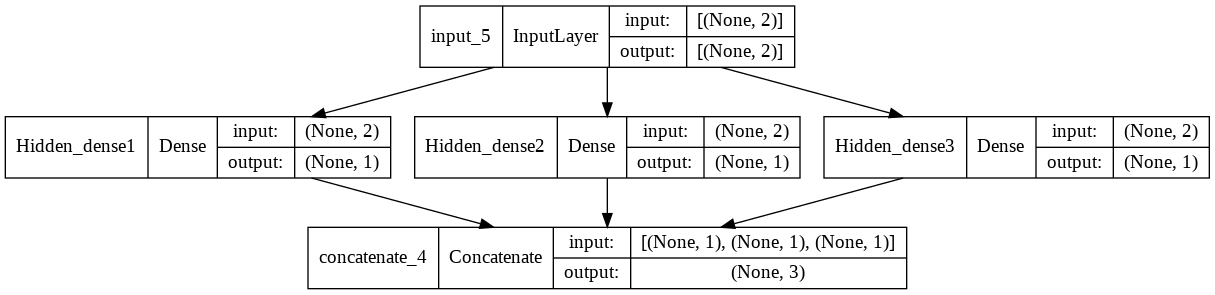

In [20]:
inputs = Input(shape=(2,) )
output1  = Dense(1, activation='linear', name="Hidden_dense1",  use_bias=False)(inputs)
output2  = Dense(1, activation='linear',   name="Hidden_dense2",  use_bias=False)(inputs)
output3  = Dense(1, activation='linear',   name="Hidden_dense3",  use_bias=False)(inputs)
merge_layer = keras.layers.concatenate([output1, output2, output3])
# outputs = Dense(2, activation='linear', use_bias=False)(merge_layer)

model=Model(inputs, merge_layer)
model.compile(optimizer="Adam", loss='mse')
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, )

In [21]:
epochs = 100
batch_size = int(X.shape[0]/100)
print(batch_size)
history = model.fit(X, Y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X, Y), shuffle=False)

5
Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 29.3693 - val_loss: 28.8244
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 28.2985 - val_loss: 27.7620
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 27.2488 - val_loss: 26.7276
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 26.2291 - val_loss: 25.7237
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 25.2401 - val_loss: 24.7503
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 24.2814 - val_loss: 23.8067
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 23.3522 - val_loss: 22.8923
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 22.4518 - val_loss: 22.0063
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 21.5795 - val_loss: 21.1479
Epoch 10/100
100/100 [==============================] - 0s 3ms/step - l

In [22]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    # print(name, weight.shape)
    print(name, weight)

Hidden_dense1/kernel:0 [[1]
 [4]]
Hidden_dense2/kernel:0 [[2.0009]
 [4.9502]]
Hidden_dense3/kernel:0 [[3.0001]
 [5.9946]]
